# Ensemble Technique - Project

## Telecom domain

In [1]:
#Importing common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.Import and warehouse data

In [2]:
#Importing Dataset
df = pd.read_csv('TelcomCustomer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Shape of dataset : ",df.shape)

Shape of dataset :  (7043, 21)


In [4]:
# Info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#null check
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
#Printing unique values in all columns in a precise single step
print(df.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

## 2.Data Cleansing

In [7]:
df.dtypes.to_frame(name = 'Data Type')

,Data Type
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
df['Churn'] = df.Churn.astype('category')

In [9]:
df.groupby(['Churn']).count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [10]:
# Looping and converting all object type to category type
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = pd.Categorical(df[cols])
df.dtypes.to_frame(name = 'Data Type')

,Data Type
customerID,category
gender,category
SeniorCitizen,int64
Partner,category
Dependents,category
tenure,int64
PhoneService,category
MultipleLines,category
InternetService,category
OnlineSecurity,category


In [11]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Label encoding categories
for cols in df.columns:
    if df[cols].dtype.name == 'category':
        df[cols] = label_encoder.fit_transform(df[cols])

In [12]:
# Printing data types after Label encoding
df.dtypes.to_frame(name = 'Data Type')

,Data Type
customerID,int32
gender,int32
SeniorCitizen,int64
Partner,int32
Dependents,int32
tenure,int64
PhoneService,int32
MultipleLines,int32
InternetService,int32
OnlineSecurity,int32


In [13]:
#displaying a row to verify the encoding
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0


In [14]:
# customerID is a unique id given for each customer which has less/no implication in the analysis and modelling and so dropping the customerID column
del df['customerID']

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.0,1.00,2.00,2.00


## Data analysis & visualisation

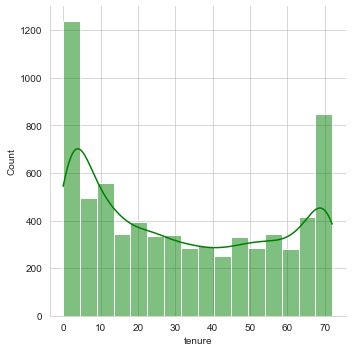

Skew of tenure 0.2395397495619829


In [16]:
# Distribution of tenure
sns.set_style("whitegrid")
sns.displot(df.tenure, kde = True, color ='green')
plt.show()
print("Skew of tenure " + str(df.tenure.skew()))

In [17]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,5407,0


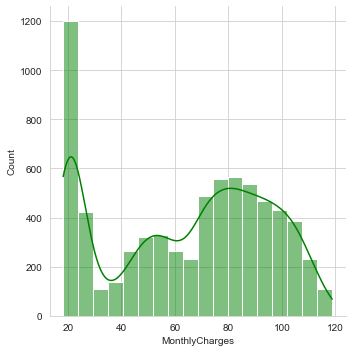

Skew of MonthlyCharges -0.22052443394398033


In [18]:
# Distribution of MonthlyCharges
sns.set_style("whitegrid")
sns.displot(df.MonthlyCharges, kde = True, color ='green')
plt.show()
print("Skew of MonthlyCharges " + str(df.MonthlyCharges.skew()))

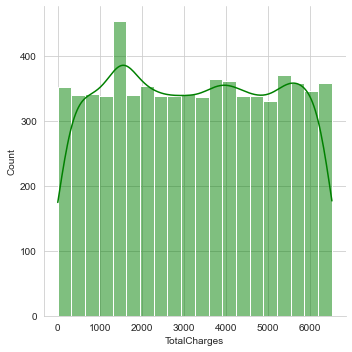

Skew of TotalCharges 0.01585710021593743


In [19]:
# Distribution of TotalCharges
sns.set_style("whitegrid")
sns.displot(df.TotalCharges, kde = True, color ='green')
plt.show()
print("Skew of TotalCharges " + str(df.TotalCharges.skew()))

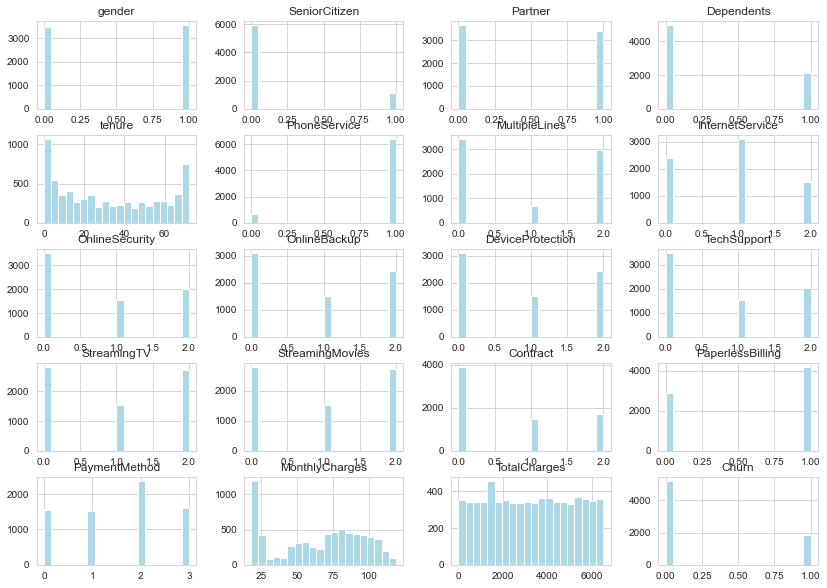

In [20]:
#Displaying the distribution of all the numerical attributes
df.hist(bins = 20, figsize = (14, 10), color = 'lightblue')
plt.show()

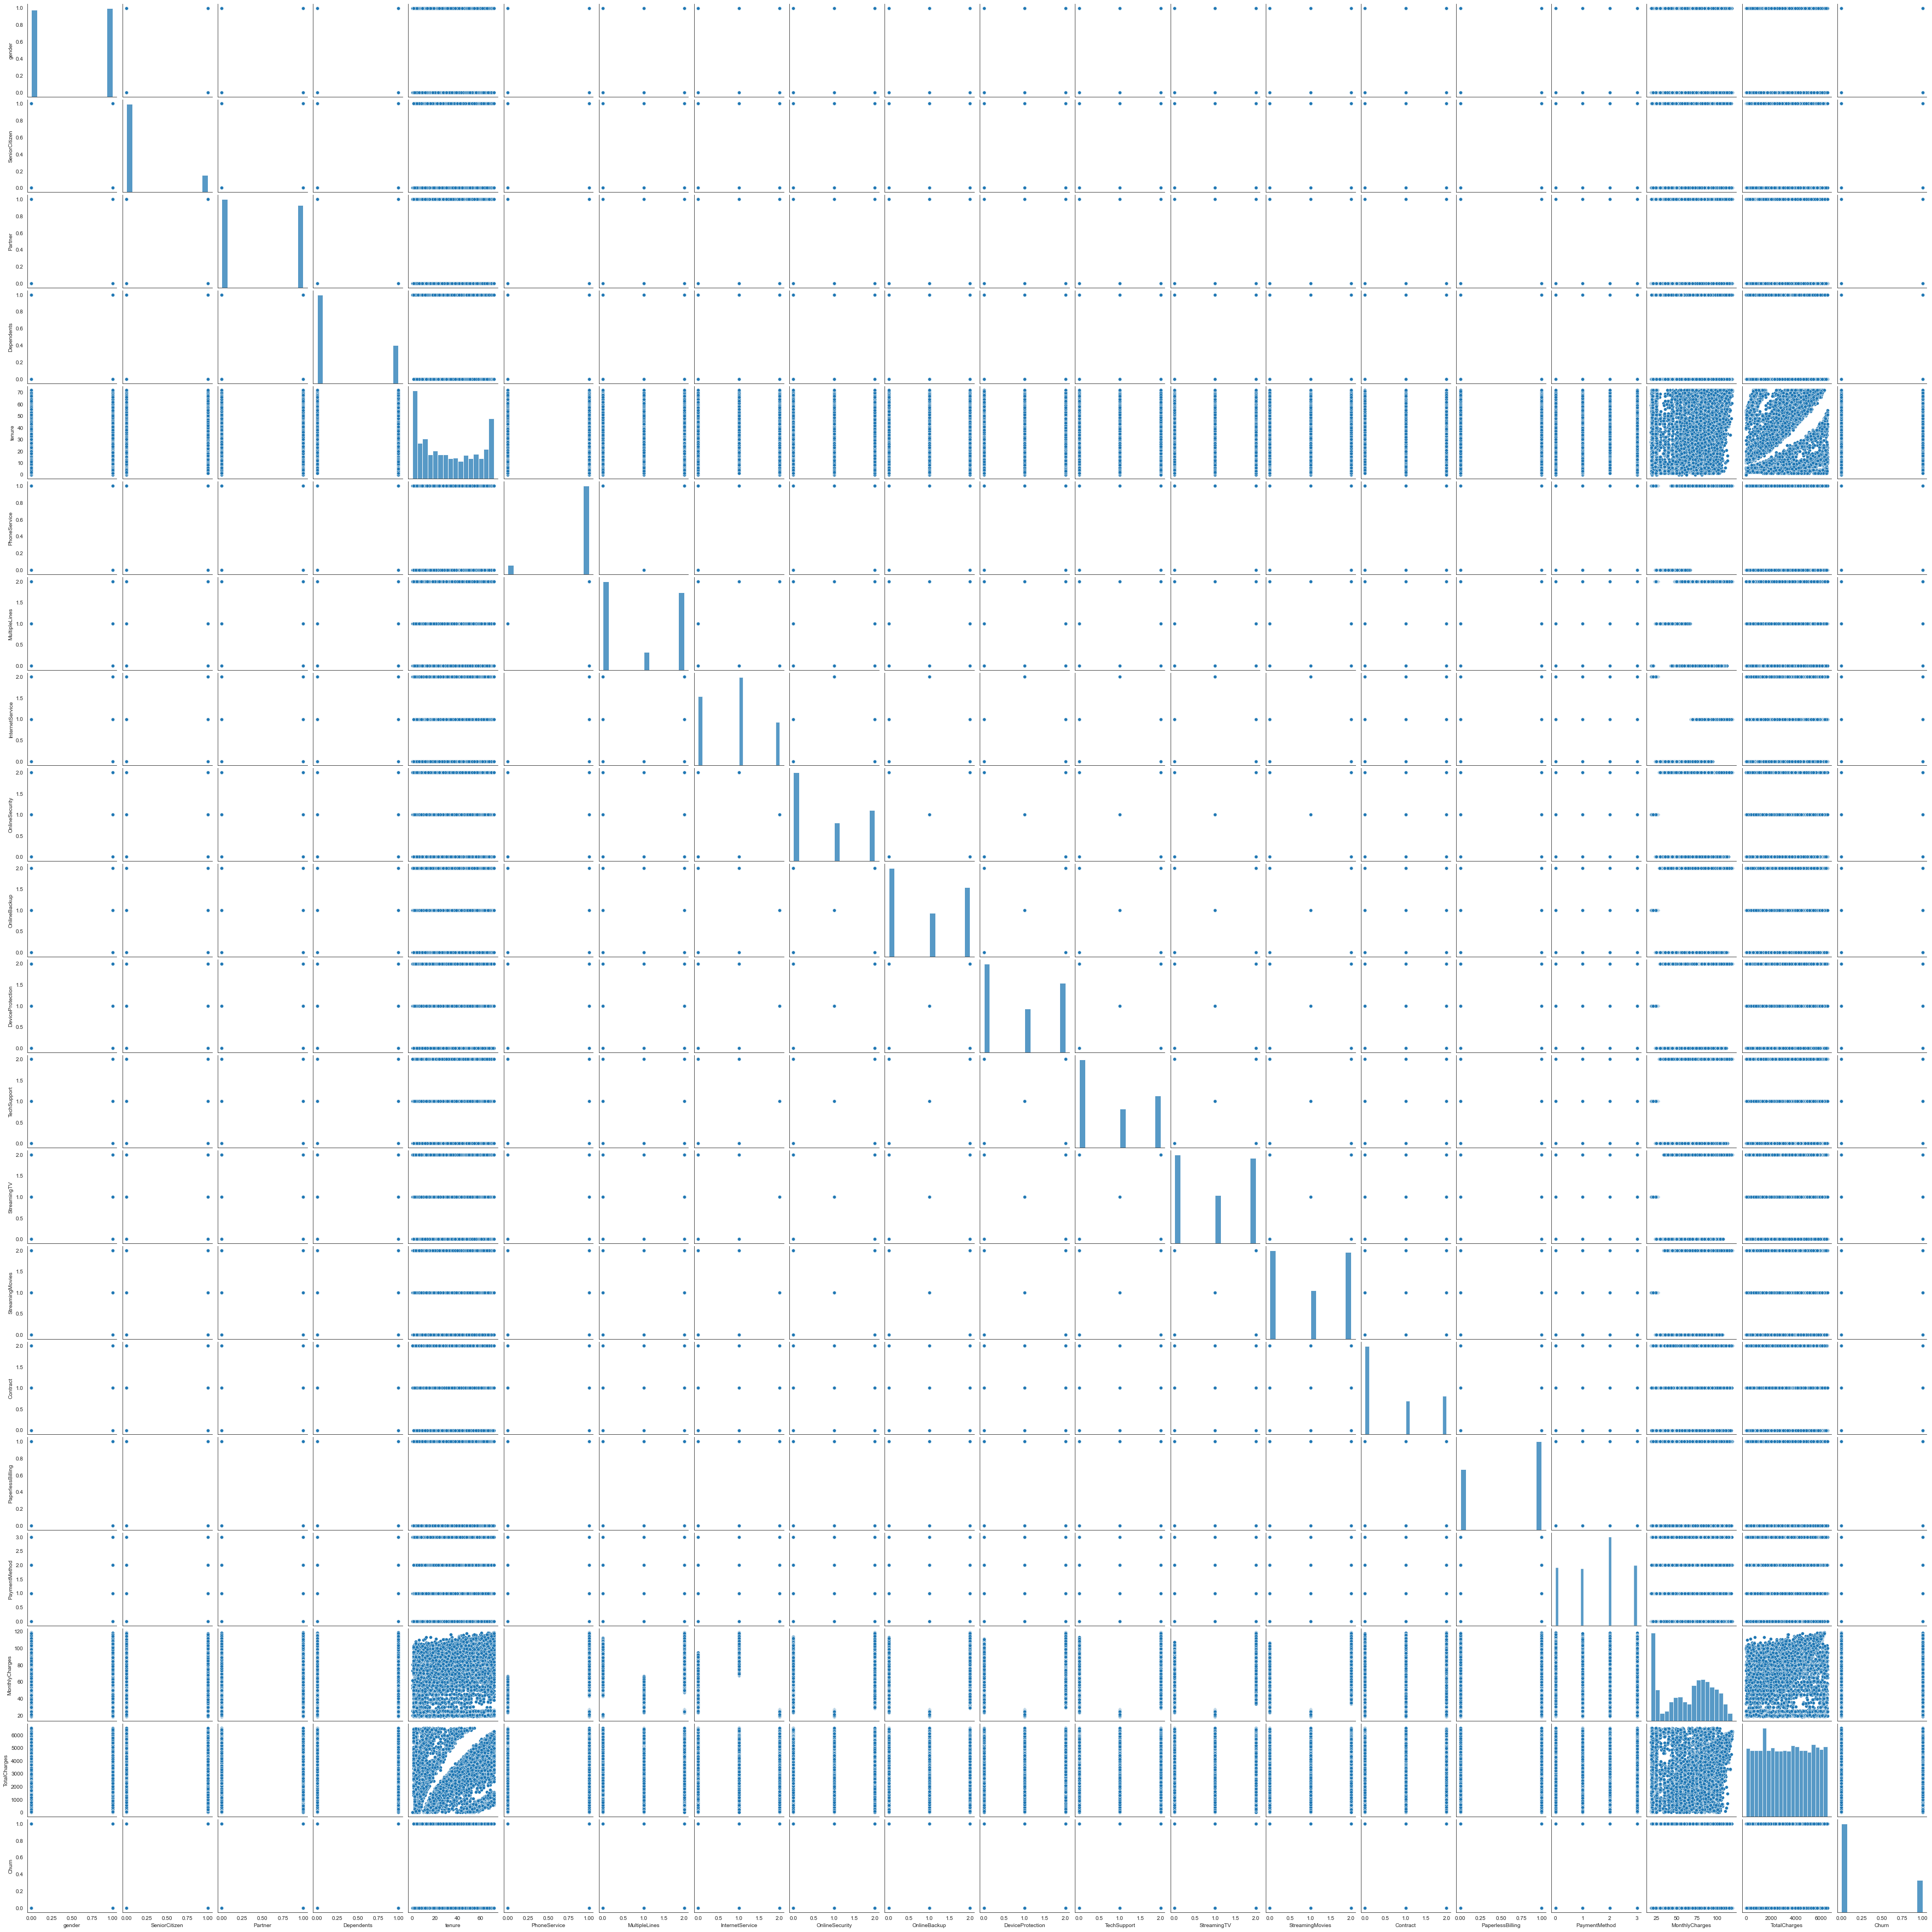

In [21]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(df)
plt.show()

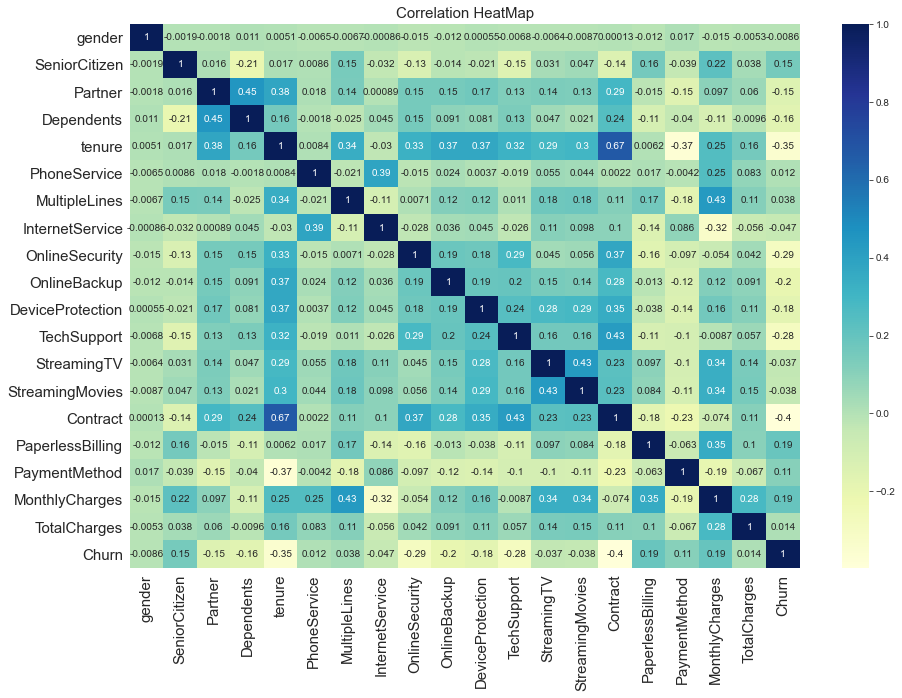

In [22]:
# Plotting the correlation heat map to understand the correlation between variables
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

## 4.Data pre-processing

In [23]:
#Split Data
X = df.drop("Churn", axis=1)
y = df['Churn']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## 5.Model training, testing and tuning

## Decision Tree

In [25]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
#Descision Tree score
print('Decision Tree - Accuracy score - Test' , dTree.score(X_test, y_test))
print('Decision Tree - Accuracy score - Train', dTree.score(X_train, y_train))

Decision Tree - Accuracy score - Test 0.7316611452910554
Decision Tree - Accuracy score - Train 0.9979716024340771


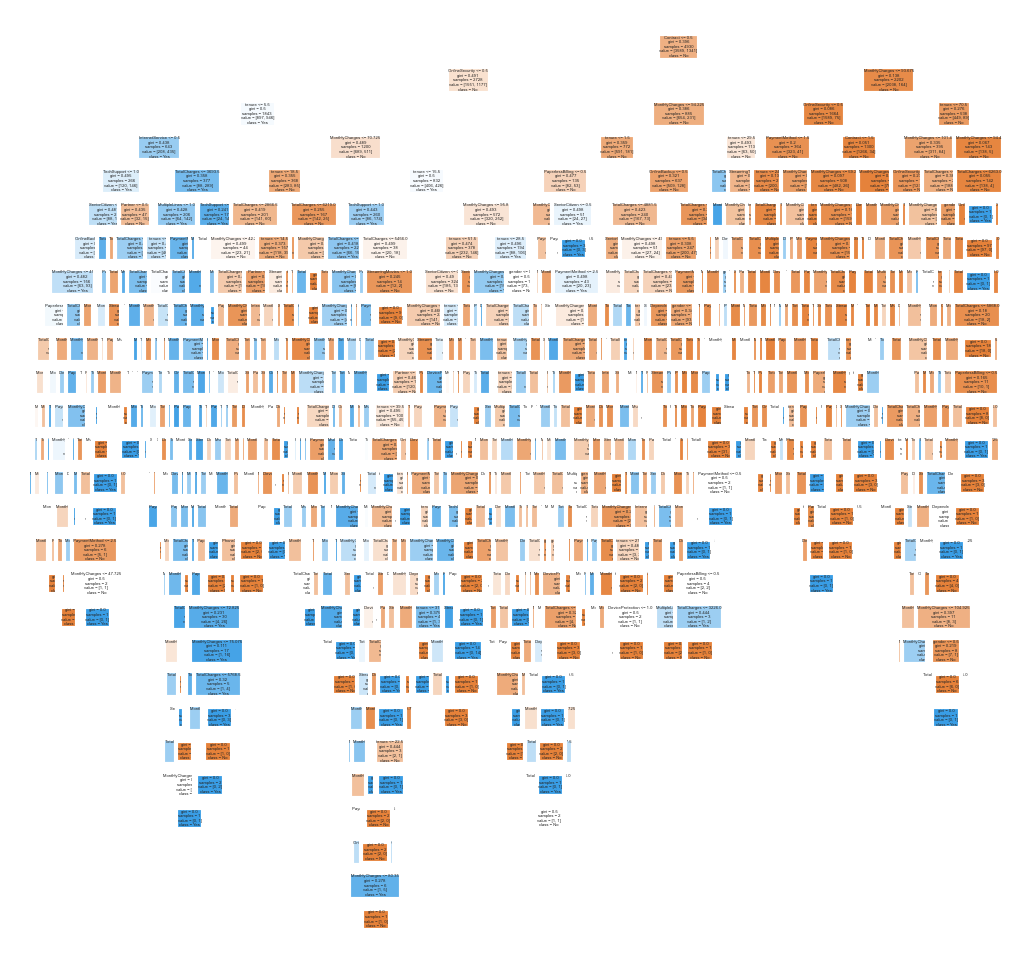

In [27]:
#Visualizing the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [28]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print('Decision Tree Test Accuracy Score', dTreeR.score(X_test, y_test))
print('Decision Tree Train Accuracy Score', dTreeR.score(X_train, y_train))

Decision Tree Test Accuracy Score 0.7917652626597255
Decision Tree Train Accuracy Score 0.7740365111561867


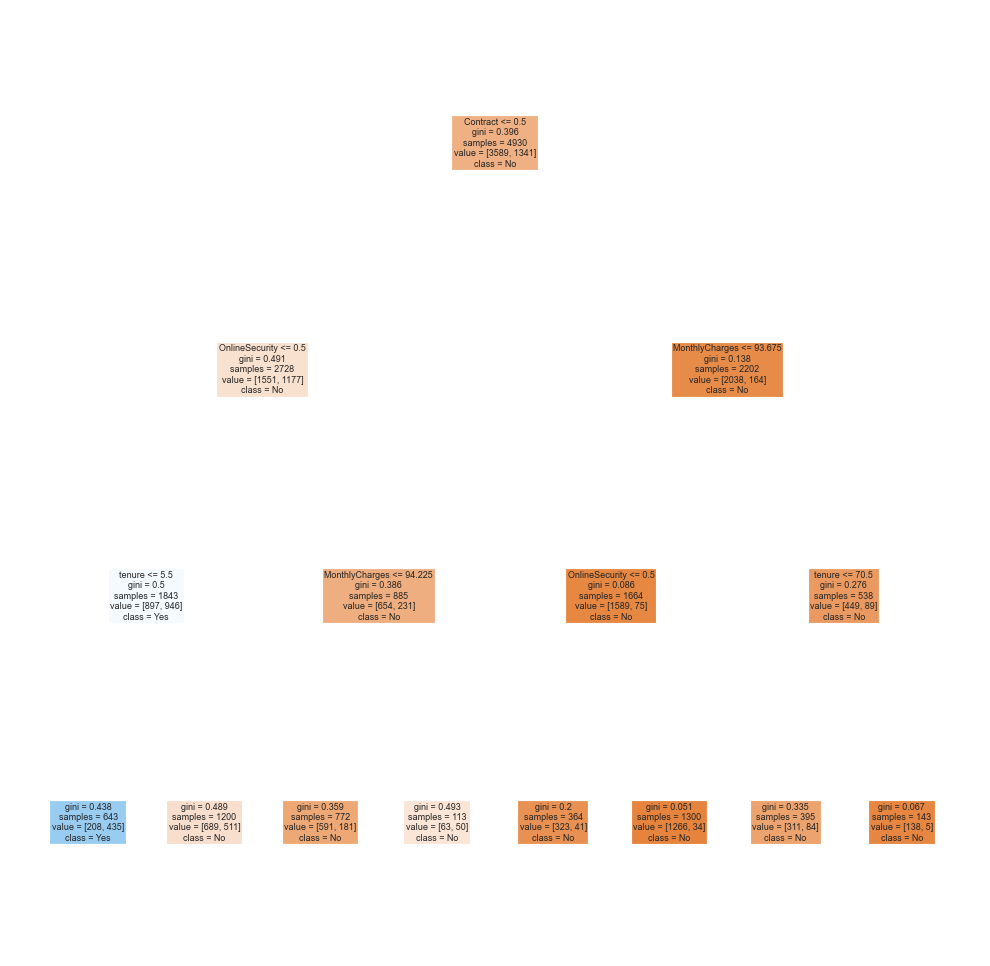

In [29]:
#Visualizing the Decision Tree - Regularized
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree-r.png')

In [30]:
# Calcualting Gini Imporance for all columns
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000000
SeniorCitizen     0.000000
Partner           0.000000
Dependents        0.000000
tenure            0.125941
PhoneService      0.000000
MultipleLines     0.000000
InternetService   0.000000
OnlineSecurity    0.170808
OnlineBackup      0.000000
DeviceProtection  0.000000
TechSupport       0.000000
StreamingTV       0.000000
StreamingMovies   0.000000
Contract          0.660082
PaperlessBilling  0.000000
PaymentMethod     0.000000
MonthlyCharges    0.043169
TotalCharges      0.000000


<AxesSubplot:>

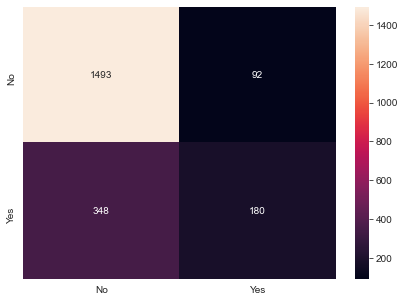

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [33]:
from sklearn import metrics
print("Decision Tree Metrics = \n", metrics.classification_report(y_test, y_predict))

Decision Tree Metrics = 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1585
           1       0.66      0.34      0.45       528

    accuracy                           0.79      2113
   macro avg       0.74      0.64      0.66      2113
weighted avg       0.77      0.79      0.77      2113



##  Bagging

In [34]:
#Ensemble Technique - Bagging
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


Bagging Test Accuracy Score 0.7979176526265973
Bagging Train Accuracy Score 0.9977687626774848


<AxesSubplot:>

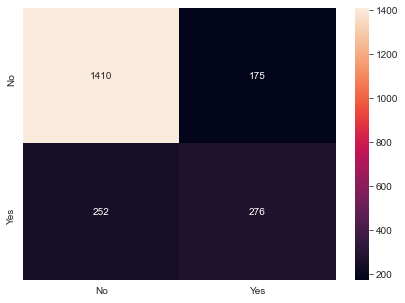

In [35]:
y_predict = bgcl.predict(X_test)

print('Bagging Test Accuracy Score', bgcl.score(X_test , y_test))
print('Bagging Train Accuracy Score', bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [36]:
print("Bagging Metrics = \n", metrics.classification_report(y_test, y_predict))

Bagging Metrics = 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.52      0.56       528

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## AdaBoosting

In [37]:
#Ensemble Technique - AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

AdaBoosting Test Accuracy Score 0.7969711310932324
AdaBoosting Train Accuracy Score 0.7957403651115619


<AxesSubplot:>

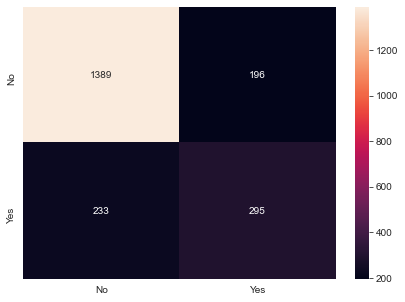

In [38]:
y_predict = abcl.predict(X_test)
print('AdaBoosting Test Accuracy Score', abcl.score(X_test , y_test))
print('AdaBoosting Train Accuracy Score', abcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [39]:
print("AdaBoosting Metrics = \n", metrics.classification_report(y_test, y_predict))

AdaBoosting Metrics = 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.60      0.56      0.58       528

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## GradientBoost

In [40]:
#Ensemble Technique - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

GradientBoost Test accuracy score 0.8130619971604354
GradientBoost Train accuracy score 0.8152129817444219


<AxesSubplot:>

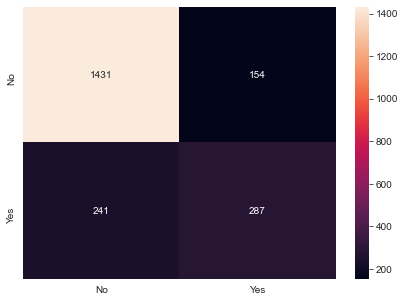

In [41]:
y_predict = gbcl.predict(X_test)
print('GradientBoost Test accuracy score', gbcl.score(X_test, y_test))
print('GradientBoost Train accuracy score', gbcl.score(X_train, y_train))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [42]:
print("Gradient Boosting Metrics = \n", metrics.classification_report(y_test, y_predict))

Gradient Boosting Metrics = 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.65      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.74      2113
weighted avg       0.80      0.81      0.81      2113



## RandomForest

In [43]:
#Ensemble Technique - RandomForest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

Random Forest Test Accuracy Score 0.8017037387600567
Random Forest Train Accuracy Score 0.9971602434077079


<AxesSubplot:>

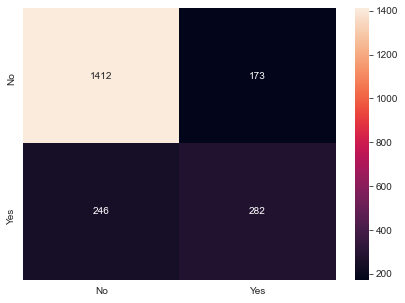

In [44]:
y_predict = rfcl.predict(X_test)
print('Random Forest Test Accuracy Score', rfcl.score(X_test, y_test))
print('Random Forest Train Accuracy Score', rfcl.score(X_train, y_train))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [45]:
print("Random Forest Metrics = \n", metrics.classification_report(y_test, y_predict))

Random Forest Metrics = 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.62      0.53      0.57       528

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.80      2113



### Performance of all the above Ensemble Techniques

In [46]:
finalData = {
  "Model": ['Decision Tree', 'Bagging', 'AdaBoosting', 'Gradient Boosting', 'Random Forest'],
  "Accuracy Score - Training Data": [' 0.7740365111561867', '0.9977687626774848', '0.7957403651115619', '0.8152129817444219', '0.9971602434077079'],
  "Accuracy Score - Testing Data": ['0.7917652626597255', '0.7979176526265973', '0.7969711310932324', '0.8130619971604354', '0.8017037387600567'],
  "Precision": ['0.66', '0.61', '0.60', '0.65', '0.62'],
  "Recall": ['0.34', '0.52', '0.56', '0.54', '0.53'],
  "F1 Score": ['0.45', '0.56', '0.58', '0.59', '0.57'],
  "Support": ['528', '528', '528', '528', '528']  
}


fainlDf = pd.DataFrame(finalData)

fainlDf 

,Model,Accuracy Score - Training Data,Accuracy Score - Testing Data,Precision,Recall,F1 Score,Support
0,Decision Tree,0.7740365111561867,0.7917652626597255,0.66,0.34,0.45,528
1,Bagging,0.9977687626774848,0.7979176526265973,0.61,0.52,0.56,528
2,AdaBoosting,0.7957403651115619,0.7969711310932324,0.60,0.56,0.58,528
3,Gradient Boosting,0.8152129817444219,0.8130619971604354,0.65,0.54,0.59,528
4,Random Forest,0.9971602434077079,0.8017037387600567,0.62,0.53,0.57,528


## 6.Conclusion and improvisation

#### Model and Prediction conclusions
1. Bagging and Random Forest has high accuracy amongst other techniques with training data.
2. Gradient performs well with testing data.
3. From the above models and anlysis, it is observed that ensemble methods performs well with Decision tree classifiers. 

#### Data observation

1. Quality of the dataset is good.
2. No null value observed.
3. No inconsistent categorical values observed.
4. Above point was easier while making a label encoding.